# Univariate Linear Regression using Gradient Descent
While wrapping up week 1 of the course, I noticed while we discussed the gradient descent algorithm, we didn't actually implement it. So I've decided to implement the algorithm in python on my own to better understand it.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Will only be using 1 feature since this notebook is focused on univarte linear regression.

In [2]:
tset = pd.read_csv(r"C:\Users\Parker\Documents\GitHub\ai_study\data\mock_dataset.csv")
tset.head()

,x,y
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


In [3]:
def hypothesis(p0, p1, x):
    return p0 + p1*x

def mean_squared_error(p0, p1, tset):
    total_error = 0
    
    for index, row in tset.iterrows():
        x = row['x']
        y = row['y']
        total_error += (hypothesis(p0, p1, x) - y) ** 2
    return total_error / len(tset)

mean_squared_error(0, 0, tset)

238.13956769069583

In [7]:
# empty list to store 
params_cost = []

def batch_gradient(p0, p1, tset, learning_rate):
    p0_gradient = 0
    p1_gradient = 0
    m = len(tset)
    
    for index, row in tset.iterrows():
        x = row['x']
        y = row['y']
        # compute gradients
        p0_gradient =+ (1/m) * (hypothesis(p0, p1, x) - y)
        p1_gradient =+ (1/m) * ((hypothesis(p0, p1, x) - y) * x)
        
    # update paramaters
    p0 = p0 - (learning_rate * p0_gradient)
    p1 = p1 - (learning_rate * p1_gradient)
    
    # visualize
    plt.plot(tset['x'], tset['y'], 'o')
    plt.plot(tset['x'], hypothesis(p0, p1, tset['x']), 'r-')
    plt.show()
    plt.clf()
        
    return [p0, p1]

def gradient_descent(tset, p0, p1, learning_rate, epochs):
    for i in range(epochs):
        params_cost.append(mean_squared_error(p0, p1, tset))
        p0, p1 = batch_gradient(p0, p1, tset, learning_rate)
    return [p0, p1]

def hy(x):
    return p0 + p1*x

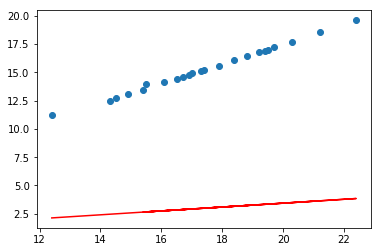

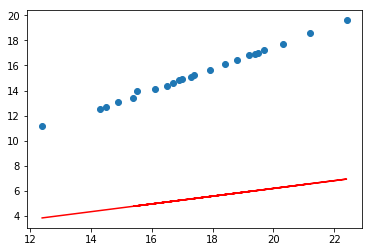

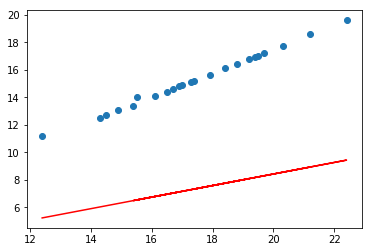

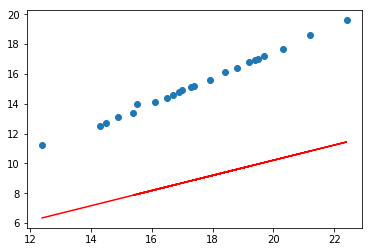

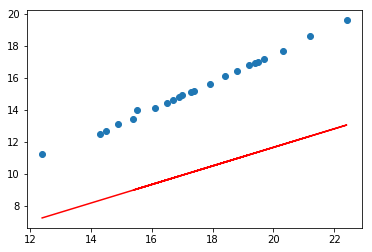

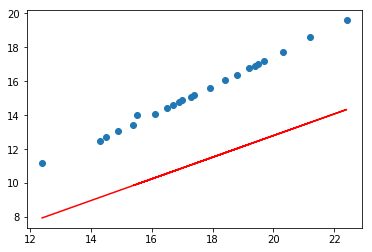

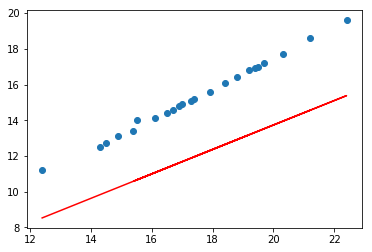

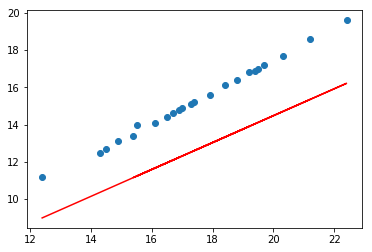

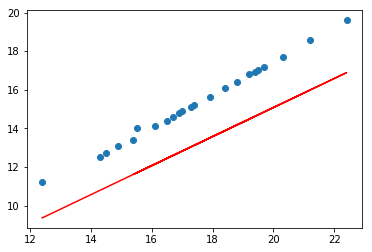

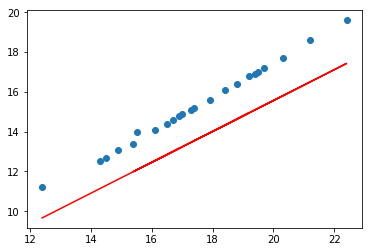

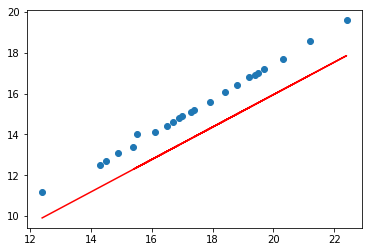

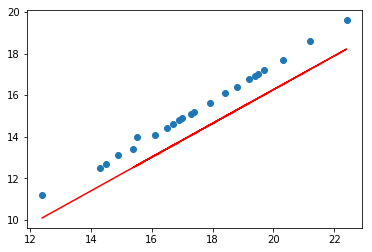

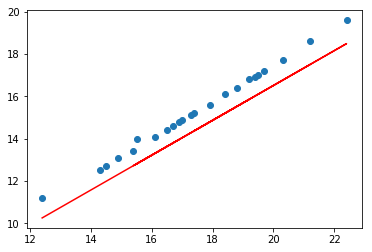

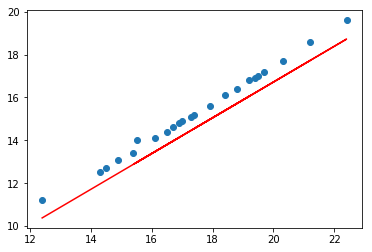

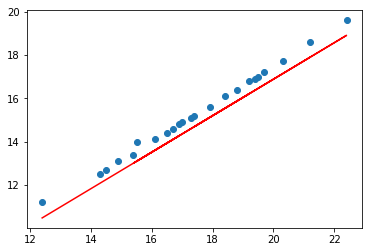

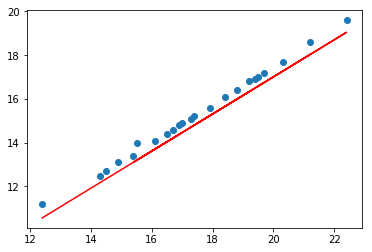

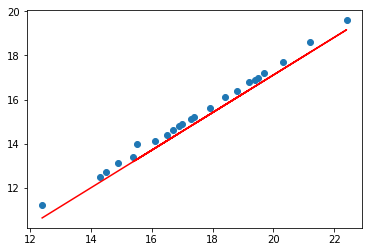

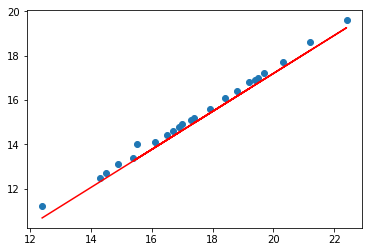

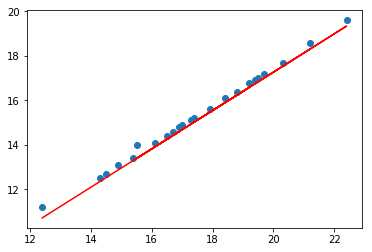

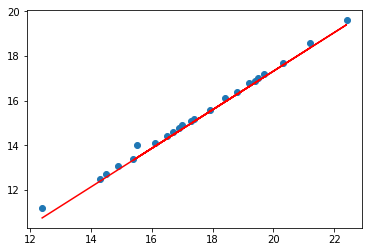

<Figure size 432x288 with 0 Axes>

In [12]:
learning_rate = 0.01
epochs = 20

# intialize parameters values
p0 = 0
p1 = 0

# run gradient descent algo
gd_p0, gd_p1 = gradient_descent(tset, p0, p1, learning_rate, epochs)

We can see that our learning algorithim is producing hypothesis functions that better fits our training data set each iteration.

Text(0, 0.5, 'cost (mean squared error)')

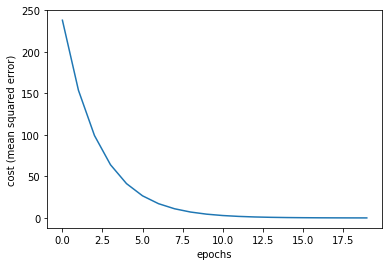

In [9]:
plt.plot(params_cost)
plt.xlabel('epochs')
plt.ylabel('cost (mean squared error)')

This is what we want to see while implementing gradient descent. We can clearly see that our algorithm successfuly converged to a local optimum.

In [13]:
# cost of our inital hypothesis function
print(mean_squared_error(0, 0, tset))

# cost of final hypothesis function produced by algo
print(mean_squared_error(gd_p0, gd_p1, tset))

238.13956769069583
0.040161285090745555


Our learning algorithim was able to find a hypothesis function that had a much lower cost (mean squared error) than the inital hypothesis function we started with. Just for clarity sake, let's take a look at what it looks like when you set your gradient algorithm learning rate too high and the algorithim fails to converge.

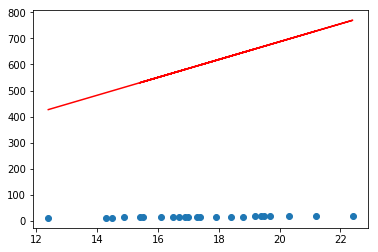

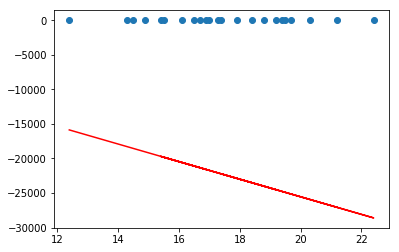

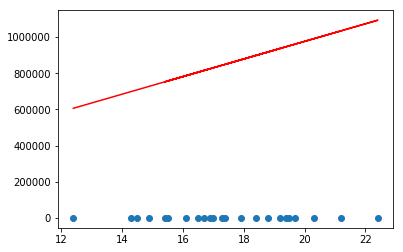

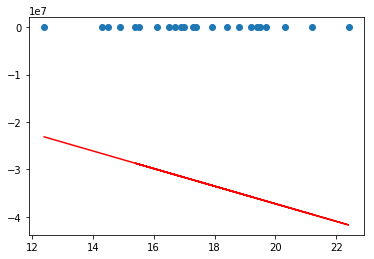

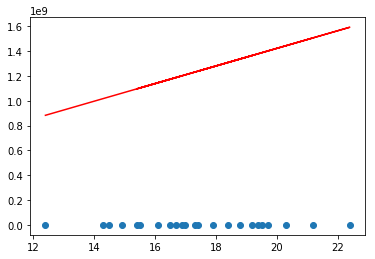

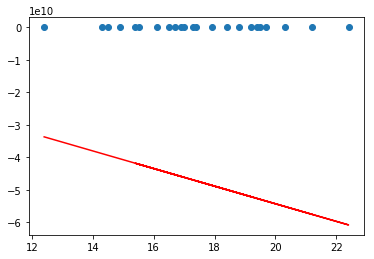

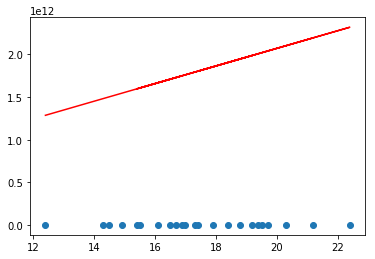

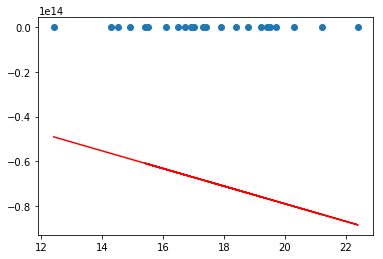

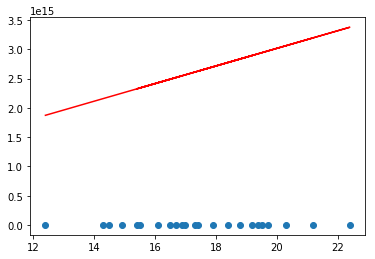

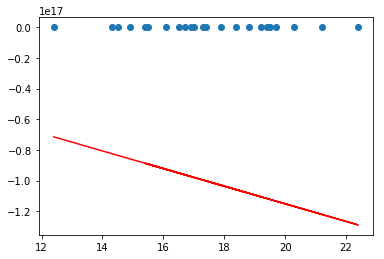

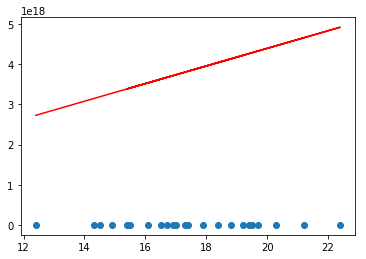

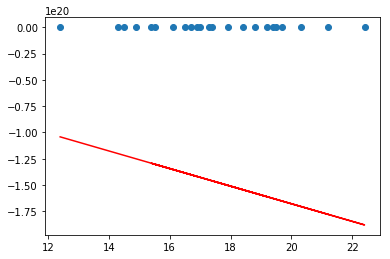

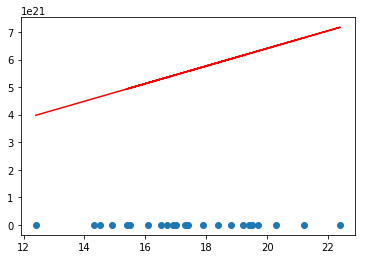

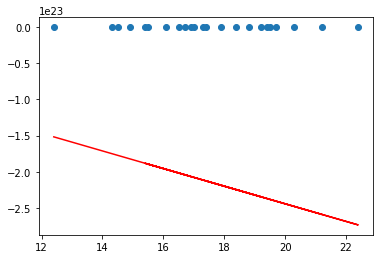

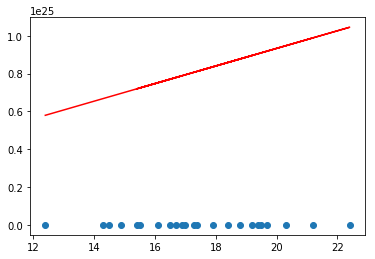

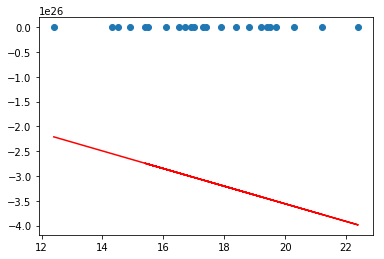

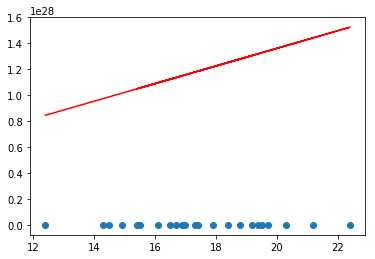

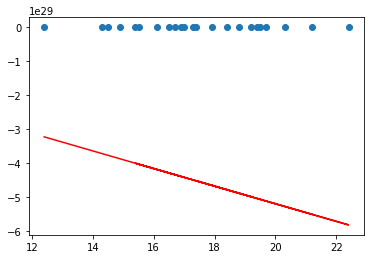

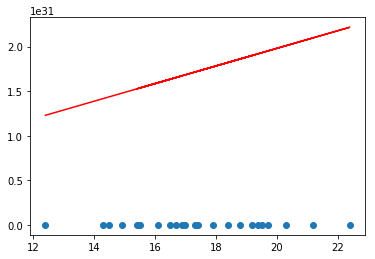

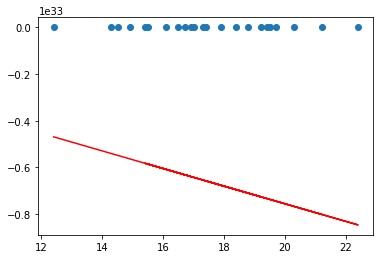

<Figure size 432x288 with 0 Axes>

In [16]:
# reinitalize param-cost list
params_cost = []

# setting learning rate high enough to make algo diverge
learning_rate = 2
epochs = 20

# intialize parameters values
p0 = 0
p1 = 0

# run gradient descent algo
gd_p0, gd_p1 = gradient_descent(tset, p0, p1, learning_rate, epochs)

Text(0, 0.5, 'cost (mean squared error)')

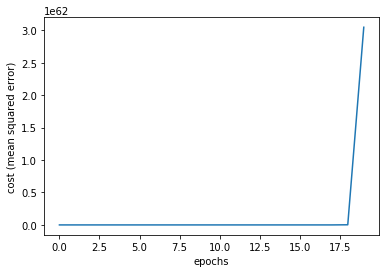

In [17]:
plt.plot(params_cost)
plt.xlabel('epochs')
plt.ylabel('cost (mean squared error)')

You can see from the last 2 visuals appear a lot different from the 2 before it. This is an example of when you set your learning rate to high for gradient descent and it fails to converge (aglo diverges from local optimum). The way I like to think of this is like a pinball bouncing around in a pinball machine forever.z